In [1]:
# Import Libraries

import os  
import time  
import spotipy  
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import preprocessing

In [ ]:
# Initialize parameters

cid= "YOUR-CLIENT-ID-HERE"
csecret= "CLIENT_SECRET"
username = "YOUR-SPOTIFY-USERNAME"
redirecturi = 'http://localhost:5000'
thescope = 'playlist-read-private'

client_credentials_manager = SpotifyClientCredentials(client_id=cid,client_secret=csecret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

plists={}

In [2]:
#read credentials
CLIENT_ID= "1f5f67d577e74fcebdc11ca5f48cba4a"
CLIENT_SECRET= "f7392ad4d9bc4841af4db3d55b2cb033"
REDIRECT_URI = 'http://localhost:5000'
SCOPE = 'playlist-read-private'


USERNAME = "udf6abeid6iuhautqufj8rruf"
URIS = ['spotify:playlist:2XF4xx2KLOCRqB8GE4S48E', 'spotify:playlist:601xuhoIObcc1GWqe3dgtN', 'spotify:playlist:0J27PjFNHSi4XpbY8TEChh']
FL= ['artist1','title','popularity','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', \
     'loudness', 'speechiness', 'tempo', 'key', 'duration_ms', 'time_signature', 'valence', "playlist_type"]



In [3]:
def extract_features(uris, feature_list):
    
    playlist_id = uri.split(':')[2]
    response = spotify.user_playlist(user = USERNAME,playlist_id = playlist_id,fields="tracks,next")
    playlist_type = spotify.user_playlist(user = USERNAME,playlist_id = playlist_id)['name'] 
    tracks=response["tracks"] 
    trackids=[i["track"]["uri"].split(":")[2] for i in tracks["items"]]
    
    
    #get song titles & song features
    title=[]
    song_features=[]
    artist1=[]
    popularity=[]


    j=0
    for i in trackids:
        j=j+1

        #title update
        title.append(spotify.track(i)["name"])

        #popularity update
        popularity.append(spotify.track(i)["popularity"])

        #song update:
        all_features =list(spotify.audio_features(trackids[0])[0].keys())
        song_features.append([spotify.audio_features(i)[0] [x] for x in all_features])

        # artist update
        artist1.append(spotify.track(i)["artists"][0]["name"])
        
        
    #     if len(spotify.track(i)["artists"])==1:
    #         artist2.append(np.nan)
    #     else:
    #         artist2.append(spotify.track(i)["artists"][1]["name"])


        if j%10==0:
            print(j)
            
            
    #convert the information to pandas dataframe
    playlist=pd.DataFrame(song_features)
    playlist.columns=all_features
    playlist =playlist.assign(title=title, artist1=artist1, popularity=popularity, playlist_type = playlist_type)
    
    #df_audio = 
    
    return playlist[feature_list] #df_audio



In [4]:
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID,client_secret=CLIENT_SECRET)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Measuring time
start = time.time()
df_song_features = pd.DataFrame()
for uri in URIS: #Convert to multiprocessing
    print(uri)
    df_uri = extract_features(uris = uri , feature_list =FL)
    df_song_features = df_song_features.append(df_uri)
    print("*******")
    
stop = time.time()
print ('Code runtime (sec):', stop - start)

    

spotify:playlist:2XF4xx2KLOCRqB8GE4S48E
10
20
30
40
50
60
70
80
*******
spotify:playlist:601xuhoIObcc1GWqe3dgtN
10
*******
spotify:playlist:0J27PjFNHSi4XpbY8TEChh
10
20
*******
Code runtime (sec): 346.82732486724854


In [6]:
df_song_features.head()

,artist1,title,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,duration_ms,time_signature,valence,playlist_type
0,Rae Sremmurd,Lit Like Bic,51,0.00645,0.728,0.684,0.000000,0.4580,-4.971,0.0536,124.013,0,274760,4,0.139,Hype Stuff
1,Drake,Still Here,64,0.02580,0.834,0.433,0.000000,0.6330,-9.607,0.1740,133.938,0,189853,3,0.229,Hype Stuff
2,Big Sean,Who's Stopping Me (& Metro Boomin),55,0.42500,0.664,0.552,0.000000,0.0757,-10.479,0.3060,99.721,7,213600,4,0.763,Hype Stuff
3,Travis Scott,Nightcrawler (feat. Swae Lee & Chief Keef),67,0.00134,0.522,0.728,0.000000,0.1320,-3.801,0.0323,124.045,3,321560,4,0.180,Hype Stuff
4,Post Malone,rockstar,2,0.12800,0.580,0.531,0.000127,0.1430,-6.631,0.0776,159.786,5,218320,4,0.141,Hype Stuff


### Data Exploration

In [7]:
df_song_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 0 to 24
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist1           128 non-null    object 
 1   title             128 non-null    object 
 2   popularity        128 non-null    int64  
 3   acousticness      128 non-null    float64
 4   danceability      128 non-null    float64
 5   energy            128 non-null    float64
 6   instrumentalness  128 non-null    float64
 7   liveness          128 non-null    float64
 8   loudness          128 non-null    float64
 9   speechiness       128 non-null    float64
 10  tempo             128 non-null    float64
 11  key               128 non-null    int64  
 12  duration_ms       128 non-null    int64  
 13  time_signature    128 non-null    int64  
 14  valence           128 non-null    float64
 15  playlist_type     128 non-null    object 
dtypes: float64(9), int64(4), object(3)
memory usa

In [8]:
df_song_features.describe()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,key,duration_ms,time_signature,valence
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,42.109375,0.276994,0.662430,0.561916,0.116899,0.187330,-7.918406,0.113885,126.505937,5.187500,231340.617188,3.890625,0.349324
std,25.282416,0.306857,0.165091,0.180424,0.275634,0.149432,4.266737,0.100140,26.888019,3.573194,75226.288656,0.337531,0.210524
min,0.000000,0.000590,0.220000,0.029400,0.000000,0.045700,-23.924000,0.026200,75.011000,0.000000,127920.000000,3.000000,0.037100
25%,25.250000,0.041925,0.560500,0.476000,0.000000,0.098650,-9.204500,0.041300,102.628250,1.000000,188102.250000,4.000000,0.167000
50%,51.500000,0.131500,0.702000,0.566500,0.000000,0.128000,-7.030000,0.067000,130.040000,5.000000,211524.000000,4.000000,0.330000
75%,60.250000,0.450750,0.781000,0.677250,0.006998,0.220250,-5.099250,0.171750,146.178000,8.000000,262188.000000,4.000000,0.482750
max,83.000000,0.979000,0.930000,0.898000,0.953000,0.927000,-0.777000,0.397000,181.444000,11.000000,776640.000000,5.000000,0.923000


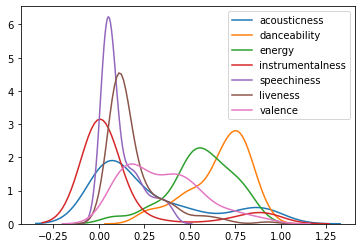

In [9]:
# Overall
sns.kdeplot(df_song_features['acousticness'])
sns.kdeplot(df_song_features['danceability'])
sns.kdeplot(df_song_features['energy'])
sns.kdeplot(df_song_features['instrumentalness'])
sns.kdeplot(df_song_features['speechiness'])
sns.kdeplot(df_song_features['liveness'])
sns.kdeplot(df_song_features['valence'])
plt.show()

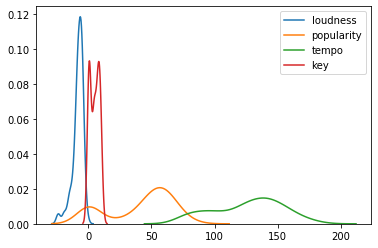

In [10]:
sns.kdeplot(df_song_features['loudness'])
sns.kdeplot(df_song_features['popularity'])
sns.kdeplot(df_song_features['tempo'])
sns.kdeplot(df_song_features['key'])

plt.show()

In [11]:
numerical_features = ['popularity','acousticness','danceability','energy','instrumentalness','liveness',
                      'loudness','speechiness','tempo','valence']
df_song_features[numerical_features].describe()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,42.109375,0.276994,0.662430,0.561916,0.116899,0.187330,-7.918406,0.113885,126.505937,0.349324
std,25.282416,0.306857,0.165091,0.180424,0.275634,0.149432,4.266737,0.100140,26.888019,0.210524
min,0.000000,0.000590,0.220000,0.029400,0.000000,0.045700,-23.924000,0.026200,75.011000,0.037100
25%,25.250000,0.041925,0.560500,0.476000,0.000000,0.098650,-9.204500,0.041300,102.628250,0.167000
50%,51.500000,0.131500,0.702000,0.566500,0.000000,0.128000,-7.030000,0.067000,130.040000,0.330000
75%,60.250000,0.450750,0.781000,0.677250,0.006998,0.220250,-5.099250,0.171750,146.178000,0.482750
max,83.000000,0.979000,0.930000,0.898000,0.953000,0.927000,-0.777000,0.397000,181.444000,0.923000


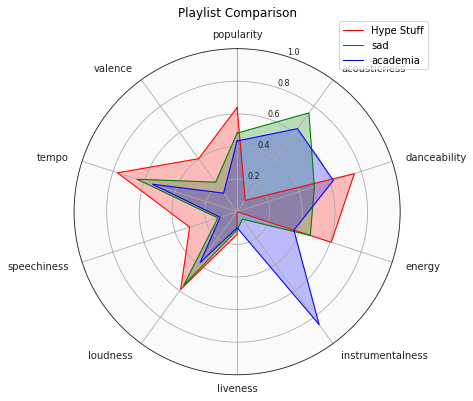

In [12]:
# Split the circle into even parts and save the angles so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, len(numerical_features), endpoint=False).tolist()
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))


# Helper function to plot each playlist on the radar chart.
def add_to_radar(df, type_plist, color):
    playlist = df[df['playlist_type'] ==type_plist]
    values = [np.median(playlist['popularity'])/max(df['popularity']), np.median(playlist['acousticness']), 
              np.median(playlist['danceability']),np.median(playlist['energy']), np.median(playlist['instrumentalness']),
              np.median(playlist['liveness']),np.median(playlist['loudness']++ abs(min(playlist['loudness'])))/abs(min(playlist['loudness'])) ,
              np.median(playlist['speechiness'])*3,np.median(playlist['tempo'])/max(df['tempo']),np.median(playlist['valence'])]
              
   
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, label=type_plist)
    ax.fill(angles, values, color=color, alpha=0.25)

# Add each additional playlist to the chart.
add_to_radar(df_song_features,'Hype Stuff', 'red')
add_to_radar(df_song_features,'sad', 'green')
add_to_radar(df_song_features,'academia', 'blue')


# polar coordinates math stuff
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), numerical_features)

# Go through labels and adjust alignment based on where it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')
    
# Set position of y-labels (0-100) to be in the middle of the first two axes.
ax.set_ylim(0, 1)
ax.set_rlabel_position(180 / len(numerical_features))

# Add some custom styling.
ax.tick_params(colors='#222222')         # color of tick labels
ax.tick_params(axis='y', labelsize=8)    # y-axis labels
ax.grid(color='#AAAAAA')                 # color of circular gridlines
ax.spines['polar'].set_color('#222222')  # color of outermost gridline (spine)
ax.set_facecolor('#FAFAFA')              # background color inside the circle itself

# Lastly, give the chart a title and a legend
ax.set_title('Playlist Comparison', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()

#fig.savefig('playlist_comp.png')
